In [14]:
import pandas as pd
import numpy as np

claims_data = pd.read_excel('claims_data.xlsx')

In [15]:
claims_data

,Claim Number,date_of_loss,Notifier,Loss_code,Loss_description,Notification_period,Inception_to_loss,Location_of_incident,Weather_conditions,Vehicle_mobile,...,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire,Incurred,Capped Incurred
0,1,2003-04-15,PH,LD003,Head on collision,22,13,Main Road,NORMAL,Y,...,1,0,0,0,0,0,0,0,0.000000,0.000000
1,2,2003-04-20,CNF,LD003,Head on collision,1,9,Main Road,WET,Y,...,0,0,0,1,0,0,0,0,2801.308013,2801.308013
2,3,2003-04-24,CNF,LD003,Head on collision,5,17,Main Road,WET,Y,...,1,0,0,0,0,0,0,0,1220.870390,1220.870390
3,4,2003-05-13,CNF,LD003,Head on collision,1,23,Main Road,N/K,Y,...,0,0,0,0,0,0,1,0,3529.868026,3529.868026
4,5,2003-06-11,CNF,LD003,Head on collision,1,48,Other,N/K,N,...,0,0,0,0,0,0,0,0,3155.987923,3155.987923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7686,7687,2015-06-30,Other,LD003,Head on collision,1,83,Main Road,NORMAL,N,...,1,0,0,0,0,0,0,0,702.814301,702.814301
7687,7688,2015-06-30,Other,LD003,Head on collision,0,25,Minor Road,NaN,Y,...,0,0,0,0,0,0,0,2,42980.618893,42980.618893
7688,7689,2015-06-30,Other,LD003,Head on collision,0,60,Minor Road,NORMAL,Y,...,0,0,0,1,0,0,0,0,5174.800838,5174.800838
7689,7690,2015-06-30,Other,LD003,Head on collision,1,253,Minor Road,NORMAL,N,...,0,0,0,0,0,0,0,0,30072.417085,30072.417085


In [16]:
third_party_columns = [col for col in claims_data.columns if col.lower().startswith('tp')]
claim_features = [col for col in claims_data if not col.lower().startswith('tp')]

In [17]:
claim_features

['Claim Number',
 'date_of_loss',
 'Notifier',
 'Loss_code',
 'Loss_description',
 'Notification_period',
 'Inception_to_loss',
 'Location_of_incident',
 'Weather_conditions',
 'Vehicle_mobile',
 'Time_hour',
 'Main_driver',
 'PH_considered_TP_at_fault',
 'Vechile_registration_present',
 'Incident_details_present',
 'Injury_details_present',
 'Incurred',
 'Capped Incurred']

In [18]:
notifier_dict = {"PH" : "policy_holder",
 "Other": "other",
 "TP": "third_party",
 "CNF": "claim_notification_form",
 "NamedDriver": "named_driver"}
claims_data["Notifier"] = claims_data["Notifier"].map(notifier_dict)

<Axes: xlabel='Vechile_registration_present', ylabel='Count'>

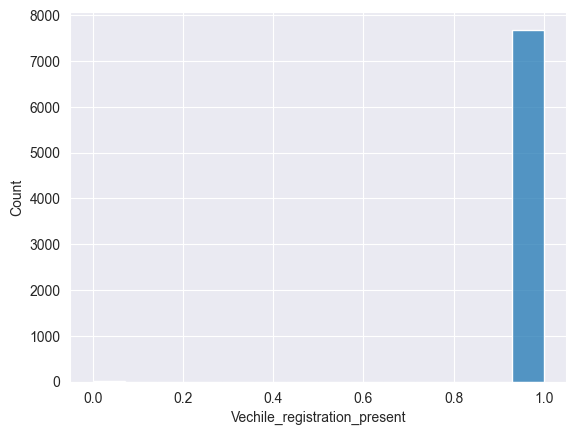

In [19]:
import seaborn as sns
sns.histplot(data=claims_data, x="Vechile_registration_present")

In [20]:
claims_data["Time_hour"].value_counts()

Time_hour
8     747
17    682
15    612
16    582
18    556
14    483
13    481
9     467
12    449
11    422
7     417
10    372
0     357
19    334
20    205
6     121
21    116
22    109
23     67
5      52
1      19
3      15
2      14
4      12
Name: count, dtype: int64

In [21]:
filtered_data = claims_data[claims_data["Incurred"] != claims_data["Capped Incurred"]]
filtered_data


,Claim Number,date_of_loss,Notifier,Loss_code,Loss_description,Notification_period,Inception_to_loss,Location_of_incident,Weather_conditions,Vehicle_mobile,...,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire,Incurred,Capped Incurred
58,59,2003-11-26,claim_notification_form,LD003,Head on collision,2,175,Minor Road,WET,N,...,0,0,0,0,1,0,0,0,70586.422221,50000.0
93,94,2003-12-30,policy_holder,LD003,Head on collision,0,33,Main Road,NORMAL,N,...,1,0,0,0,0,0,0,0,52151.197870,50000.0
126,127,2004-02-17,policy_holder,LD003,Head on collision,0,233,Minor Road,WET,Y,...,0,0,0,0,0,0,0,1,173939.237557,50000.0
150,151,2004-03-16,policy_holder,LD003,Head on collision,0,229,Minor Road,NORMAL,N,...,0,0,0,1,0,0,0,0,129265.379914,50000.0
154,155,2004-03-21,policy_holder,LD003,Head on collision,2,169,Main Road,NaN,n/k,...,0,0,0,1,0,0,0,0,148185.190928,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,7296,2015-04-11,other,LD003,Head on collision,0,113,Car Park,NaN,N,...,0,0,0,0,0,0,1,0,59537.424459,50000.0
7318,7319,2015-04-16,other,LD003,Head on collision,0,6,Minor Road,NaN,n/k,...,0,0,0,0,0,0,0,0,81913.110032,50000.0
7462,7463,2015-05-16,other,LD003,Head on collision,2,167,Main Road,NORMAL,N,...,0,0,0,0,0,0,3,0,67793.012469,50000.0
7588,7589,2015-06-11,other,LD003,Head on collision,1,216,Not Applicable,NaN,N,...,0,0,0,0,1,0,0,0,114399.747622,50000.0


In [22]:
claims_data 

,Claim Number,date_of_loss,Notifier,Loss_code,Loss_description,Notification_period,Inception_to_loss,Location_of_incident,Weather_conditions,Vehicle_mobile,...,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire,Incurred,Capped Incurred
0,1,2003-04-15,policy_holder,LD003,Head on collision,22,13,Main Road,NORMAL,Y,...,1,0,0,0,0,0,0,0,0.000000,0.000000
1,2,2003-04-20,claim_notification_form,LD003,Head on collision,1,9,Main Road,WET,Y,...,0,0,0,1,0,0,0,0,2801.308013,2801.308013
2,3,2003-04-24,claim_notification_form,LD003,Head on collision,5,17,Main Road,WET,Y,...,1,0,0,0,0,0,0,0,1220.870390,1220.870390
3,4,2003-05-13,claim_notification_form,LD003,Head on collision,1,23,Main Road,N/K,Y,...,0,0,0,0,0,0,1,0,3529.868026,3529.868026
4,5,2003-06-11,claim_notification_form,LD003,Head on collision,1,48,Other,N/K,N,...,0,0,0,0,0,0,0,0,3155.987923,3155.987923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7686,7687,2015-06-30,other,LD003,Head on collision,1,83,Main Road,NORMAL,N,...,1,0,0,0,0,0,0,0,702.814301,702.814301
7687,7688,2015-06-30,other,LD003,Head on collision,0,25,Minor Road,NaN,Y,...,0,0,0,0,0,0,0,2,42980.618893,42980.618893
7688,7689,2015-06-30,other,LD003,Head on collision,0,60,Minor Road,NORMAL,Y,...,0,0,0,1,0,0,0,0,5174.800838,5174.800838
7689,7690,2015-06-30,other,LD003,Head on collision,1,253,Minor Road,NORMAL,N,...,0,0,0,0,0,0,0,0,30072.417085,30072.417085


In [23]:
def find_columns_with_out_of_range_values(df, columns, min_value=0, max_value=5):
    out_of_range_columns = []
    for column in columns:
        if not df[column].between(min_value, max_value).all():
            out_of_range_columns.append(column)
    return out_of_range_columns

columns_with_out_of_range_values = find_columns_with_out_of_range_values(claims_data, third_party_columns, min_value=0, max_value=10)

columns_with_out_of_range_values


[]

In [24]:
#For the sake of model performance 3 datapoints isnt going to hurt when they are going to interfer with model performance.
claims_data = claims_data[~claims_data["Notification_period"] < 0]

In [25]:
claims_data = claims_data[claims_data["PH_considered_TP_at_fault"] != "#"]

In [26]:
#not removing the policies over the cap as they seems siginificant and if the model can pick them up then Id want to keep them in. 

In [28]:
bins = [0, 1, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, float('inf')]
labels = ['0', '1-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000',
          '30001-35000', '35001-40000', '40001-45000', '45001-50000', '50001+']

# Bin the data
claims_data['binned'] = pd.cut(claims_data['Incurred'], bins=bins, labels=labels, right=False)

# Display the result
claims_data['binned'].value_counts()


binned
1-5000         3704
0              1759
5001-10000      722
10001-15000     431
15001-20000     284
50001+          198
20001-25000     180
25001-30000     129
30001-35000      87
35001-40000      64
40001-45000      45
45001-50000      36
Name: count, dtype: int64